In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import re
import mygene
import random
import time

from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [28]:
def count_base(data):
    n = float('inf')
    
    for (path, _) in data:
        n = min(n, pd.read_csv(path, usecols=['label']).shape[0])

    return n

In [29]:
def filter_df(df):
    dfg = df.groupby(df["label"]).count()
    
    tcga_count = dfg.iloc[1, 0]
    gtex_count = dfg.iloc[0, 0]
    total_count = tcga_count + gtex_count

    return pd.concat([
        df[df['label'] == 1].sample(n=int(tcga_count * base_count / total_count)),
        df[df['label'] == 0].sample(n=int(gtex_count * base_count / total_count))
    ])

In [30]:
def create_merged_df(data):
    frames = []
    
    for (path, name) in data:
        print('Processing {} dataframe'.format(name))

        df = filter_df(pd.read_csv('../Output/Chunk_Skin.csv', index_col=0))
        df.columns = [(re.sub('\.\d+', '', gene)) for gene in df.columns]
        df.drop(columns=['label'], inplace=True)
        df.insert(loc=0, column='cancer', value=name)
        
        frames.append(df)

    print('Finished')
    return pd.concat(frames)

In [27]:
items = [
    ("../Output/Chunk_Skin.csv", "skin"),
    ("../Output/Chunk_Breast.csv", "breast"),
    ("../Output/Chunk_Thyroid_ThyroidGland.csv", "thyr"),
    ("../Output/Chunk_Colon.csv", "colon"),
    ("../Output/Chunk_LungAdenocarcinoma_Lung.csv", "lungA"),
    ("../Output/Chunk_LungSquamousCellCarcinoma_Lung.csv", "lungS")   
]

base_count = count_base(items)

In [31]:
df = create_merged_df(items)

Processing skin dataframe
Processing breast dataframe
Processing thyr dataframe
Processing colon dataframe
Processing lungA dataframe
Processing lungS dataframe
Finished


In [36]:
df.head()

,cancer,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
TCGA-EB-A44P-01,skin,6.1433,4.3758,4.6871,-9.9658,10.0412,6.1299,-4.2934,-6.5064,-9.9658,...,3.8431,5.8210,3.6335,5.3754,3.2267,-9.9658,-9.9658,1.5661,5.7170,-9.9658
TCGA-EB-A431-01,skin,5.1437,4.2929,3.9002,-4.0350,10.0256,6.3646,-3.3076,-1.6394,-2.8262,...,3.8451,5.5659,4.6445,5.1627,2.1313,-9.9658,-6.5064,0.9716,6.5549,-9.9658
TCGA-EB-A5SF-01,skin,4.9007,2.0004,4.0679,-2.2447,9.8412,3.1701,4.7485,-4.6082,-1.1172,...,-0.0130,3.6428,3.6680,1.6093,-0.5973,-2.7274,-9.9658,0.3573,5.5308,-9.9658
TCGA-EB-A41A-01,skin,5.7337,2.6185,4.2847,-6.5064,10.2545,4.9584,-1.8836,-3.4580,-4.2934,...,4.2048,5.1563,4.6730,5.6651,2.0218,-9.9658,-4.0350,1.9452,5.1416,-9.9658
TCGA-XV-AAZW-01,skin,6.3684,3.2811,3.2511,-3.8160,10.4888,4.9416,2.1114,-5.5735,-1.2828,...,3.0002,4.9194,4.3206,4.5766,1.0711,-5.0116,-9.9658,1.0007,5.0879,-9.9658


In [37]:
df.to_csv('../Output/Chunk_AllCancer_Split_{}.csv'.format(base_count))

In [44]:
df.columns

Index(['cancer', 'ENSG00000167578', 'ENSG00000078237', 'ENSG00000146083',
       'ENSG00000158486', 'ENSG00000198242', 'ENSG00000134108',
       'ENSG00000172137', 'ENSG00000276644', 'ENSG00000094963',
       ...
       'ENSG00000107863', 'ENSG00000213782', 'ENSG00000146707',
       'ENSG00000158417', 'ENSG00000089177', 'ENSG00000186115',
       'ENSG00000009694', 'ENSG00000123685', 'ENSG00000105063',
       'ENSG00000181518'],
      dtype='object', length=19664)

In [50]:
df_genes = pd.read_csv('../Output/Chunk_AllCancer_Split_594.csv', index_col=0)

In [51]:
df_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, TCGA-EB-A44P-01 to GTEX-ZDTT-0426-SM-4WKFL
Columns: 19664 entries, cancer to ENSG00000181518
dtypes: float64(19663), object(1)
memory usage: 533.8+ MB


In [52]:
df_genes.head()

,cancer,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
TCGA-EB-A44P-01,skin,6.1433,4.3758,4.6871,-9.9658,10.0412,6.1299,-4.2934,-6.5064,-9.9658,...,3.8431,5.8210,3.6335,5.3754,3.2267,-9.9658,-9.9658,1.5661,5.7170,-9.9658
TCGA-EB-A431-01,skin,5.1437,4.2929,3.9002,-4.0350,10.0256,6.3646,-3.3076,-1.6394,-2.8262,...,3.8451,5.5659,4.6445,5.1627,2.1313,-9.9658,-6.5064,0.9716,6.5549,-9.9658
TCGA-EB-A5SF-01,skin,4.9007,2.0004,4.0679,-2.2447,9.8412,3.1701,4.7485,-4.6082,-1.1172,...,-0.0130,3.6428,3.6680,1.6093,-0.5973,-2.7274,-9.9658,0.3573,5.5308,-9.9658
TCGA-EB-A41A-01,skin,5.7337,2.6185,4.2847,-6.5064,10.2545,4.9584,-1.8836,-3.4580,-4.2934,...,4.2048,5.1563,4.6730,5.6651,2.0218,-9.9658,-4.0350,1.9452,5.1416,-9.9658
TCGA-XV-AAZW-01,skin,6.3684,3.2811,3.2511,-3.8160,10.4888,4.9416,2.1114,-5.5735,-1.2828,...,3.0002,4.9194,4.3206,4.5766,1.0711,-5.0116,-9.9658,1.0007,5.0879,-9.9658


In [53]:
def tsne(chunk, nlabels, random_state, ncols = 100):
        """
        Create T-SNE graph 
        """
        
        # Defining Model
        model = TSNE(learning_rate=100)
        
        chunk_y = chunk["cancer"]
        chunk_100 = chunk.drop(columns = "cancer").sample(ncols, axis = 1, random_state = random_state)

        # Fitting Model
        transformed = model.fit_transform(chunk_100)

        # Plotting 2d t-Sne
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=chunk_y,
            palette=sns.color_palette("hls", nlabels),
            legend="full",
            alpha=0.3,
            ax=ax1)

In [57]:
#tsne(df_genes, df["cancer"], random_state=1888)

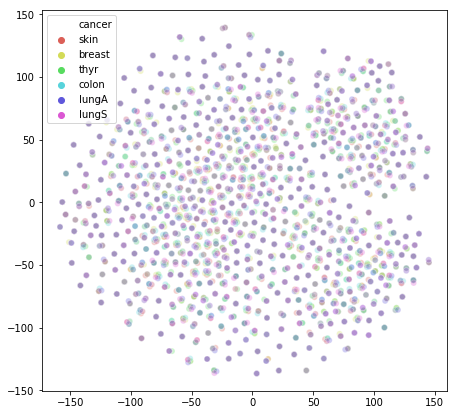

In [66]:
model = TSNE(learning_rate=100)
        
chunk_y = df_genes["cancer"]
chunk_100 = df_genes.drop(columns = "cancer").sample(500, axis = 1, random_state=1888)

# Fitting Model
transformed = model.fit_transform(chunk_100)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
        x=x_axis, y=y_axis,
        hue=chunk_y,
        palette=sns.color_palette("hls"),
        legend="full",
        alpha=0.3,
        ax=ax1)

### PCA

In [90]:
X = df_genes.drop(columns = "cancer") #.sample(2000, axis = 1, random_state=1888)
y = df_genes["cancer"]


minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)

pca_cancer = PCA(n_components=50)
princ_comp_cancer = pca_cancer.fit_transform(X_scaled)
#principalDf_cancer = pd.DataFrame(data=princ_comp_cancer, columns=["component_1", "component_2", "component_3"])
#principalDf_cancer.head()

In [86]:
pca_cancer.explained_variance_ratio_

array([0.21645408, 0.08734205, 0.03550994])

No handles with labels found to put in legend.


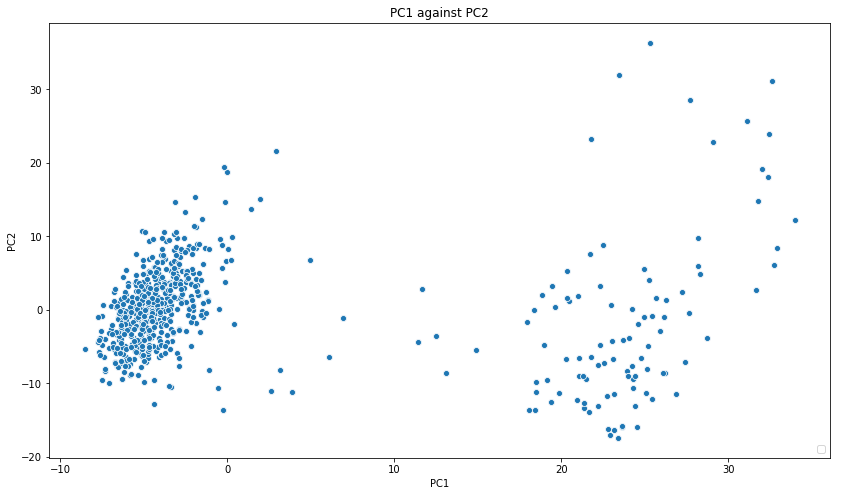

In [92]:
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x=principalDf_cancer.component_1, y=principalDf_cancer.component_2, data=principalDf_cancer, ax=ax)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower right')
plt.show()

In [93]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(princ_comp_cancer)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 18.65908670425415 seconds


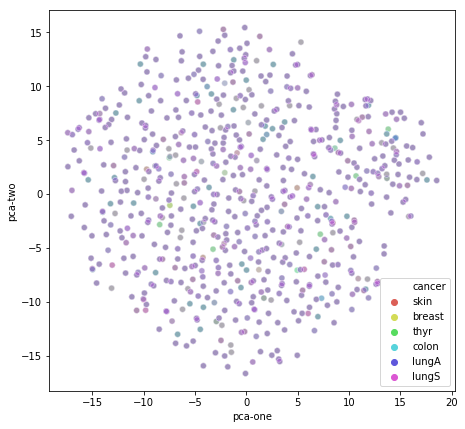

In [103]:
X['pca-one'] = tsne_pca_results[:,0]
X['pca-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=y,
    palette=sns.color_palette("hls"),
    data=X,
    legend="full",
    alpha=0.3,
    ax=ax1
)
#ax2 = plt.subplot(1, 3, 2)
#sns.scatterplot(
#    x="tsne-2d-one", y="tsne-2d-two",
#    hue="y",
 #   palette=sns.color_palette("hls", 10),
#    data=df_subset,
#    legend="full",
#    alpha=0.5,
 #   ax=ax2
#)
#ax3 = plt.subplot(1, 3, 3)
#sns.scatterplot(
#    x="tsne-pca50-one", y="tsne-pca50-two",
#    hue="y",
#    palette=sns.color_palette("hls", 10),
#    data=df_subset,
#    legend="full",
#    alpha=0.3,
#    ax=ax3
#)

plt.show()